In [1]:
!pip install wordcloud
!pip install nltk
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt
import pandas as pd
import numpy as np
import re
%matplotlib inline

  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using legacy 'setup.py install' for wordcloud, since package 'wheel' is not installed.
  Running setup.py install for wordcloud: started
  Running setup.py install for wordcloud: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Running setup.py install for wordcloud did not run successfully.
  │ exit code: 1
  ╰─> [20 lines of output]
      running install
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-3.10
      creating build\lib.win-amd64-3.10\wordcloud
      copying wordcloud\color_from_image.py -> build\lib.win-amd64-3.10\wordcloud
      copying wordcloud\tokenization.py -> build\lib.win-amd64-3.10\wordcloud
      copying wordcloud\wordcloud.py -> build\lib.win-amd64-3.10\wordcloud
      copying wordcloud\wordcloud_cli.py -> build\lib.win-amd64-3.10\wordcloud
      copying wordcloud\_version.py -> build\lib.win-amd64-3.10\wordcloud
      copying wordcloud\__init__.py -> build\lib.win-amd64-3.10\wordcloud
      copying wordcloud\__main__.py -> build\lib.win-amd64-3.10\wordcloud
      copying wordcloud\stopwords -> build\lib.win-amd64-3.10\wordcloud
      copying wordcloud\DroidSansMono.ttf -> build\lib.win-amd

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\VoiDWalker\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
tweets = pd.read_csv('/content/drive/MyDrive/DATABASE XM/depression2.csv')
tweets.head(20)

,Index,message,label
0,1,everything is too hard for me life is so hard ...,1
1,2,simonmagus you never need an excuse for a lon...,0
2,3,dubais new airport expected to be the worlds l...,0
3,4,hahah daniel aww you cried thats a sign that ...,0
4,5,ah yeah robpattznews is always on top of this...,0
5,6,elbiddulph ouch you may be my mom but even i ...,0
6,7,whyyyyy so weve all be told that depression li...,1
7,8,i just stood in pouring rain for minutes and ...,0
8,9,back to back meetings today interviewing junio...,0
9,10,thank god for the answered prayers,0


In [ ]:
tweets.drop(['Index'], axis = 1, inplace = True)

In [ ]:
tweets['label'].value_counts()

0    27202
1    13420
Name: label, dtype: int64

In [ ]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40622 entries, 0 to 40621
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  40622 non-null  object
 1   label    40622 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 634.8+ KB


In [ ]:
totalTweets = 8000 + 2314
trainIndex, testIndex = list(), list()
for i in range(tweets.shape[0]):
    if np.random.uniform(0, 1) < 0.98:
        trainIndex += [i]
    else:
        testIndex += [i]
trainData = tweets.iloc[trainIndex]
testData = tweets.iloc[testIndex]

In [ ]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40622 entries, 0 to 40621
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  40622 non-null  object
 1   label    40622 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 634.8+ KB


In [ ]:
trainData['label'].value_counts()

0    26674
1    13170
Name: label, dtype: int64

In [ ]:
trainData.head()

,message,label
0,everything is too hard for me life is so hard ...,1
1,simonmagus you never need an excuse for a lon...,0
2,dubais new airport expected to be the worlds l...,0
3,hahah daniel aww you cried thats a sign that ...,0
4,ah yeah robpattznews is always on top of this...,0


In [ ]:
testData['label'].value_counts()

0    528
1    250
Name: label, dtype: int64

In [ ]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40622 entries, 0 to 40621
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  40622 non-null  object
 1   label    40622 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 634.8+ KB


In [ ]:
totalTweets = 8000 + 2314
trainIndex, testIndex = list(), list()
for i in range(tweets.shape[0]):
    if np.random.uniform(0, 1) < 0.98:
        trainIndex += [i]
    else:
        testIndex += [i]
trainData = tweets.iloc[trainIndex]
testData = tweets.iloc[testIndex]

In [ ]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40622 entries, 0 to 40621
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  40622 non-null  object
 1   label    40622 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 634.8+ KB


In [ ]:
trainData['label'].value_counts()

0    26694
1    13132
Name: label, dtype: int64

In [ ]:
trainData.head()

,message,label
0,everything is too hard for me life is so hard ...,1
1,simonmagus you never need an excuse for a lon...,0
2,dubais new airport expected to be the worlds l...,0
3,hahah daniel aww you cried thats a sign that ...,0
4,ah yeah robpattznews is always on top of this...,0


In [ ]:
testData['label'].value_counts()

0    508
1    288
Name: label, dtype: int64

In [ ]:
testData.head()

,message,label
12,puffaddering hey hows it goin can u let me no ...,0
57,looking forward to the show tonight cant wait...,0
136,dont know what to expect from life hellonormal...,1
192,i got a job after not having a job and being l...,1
229,after taking rainomy companys dog for a walk a...,0


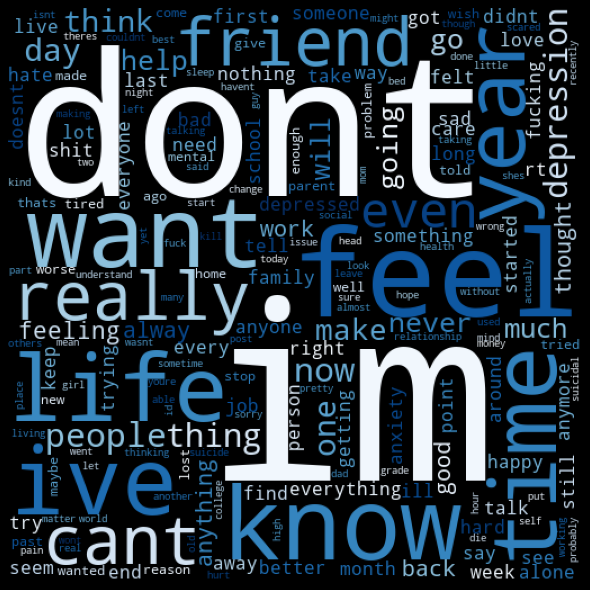

In [ ]:
depressive_words = ' '.join(list(tweets[tweets['label'] == 1]['message']))
depressive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(depressive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(depressive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

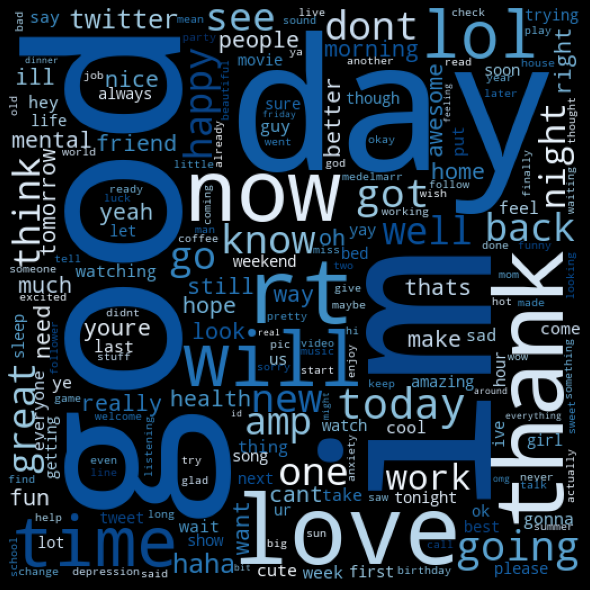

In [ ]:
positive_words = ' '.join(list(tweets[tweets['label'] == 0]['message']))
positive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(positive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(positive_wc)
plt.axis('off'), 
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
def process_message(message, lower_case = True, stem = True, stop_words = True, gram = 2):
    if lower_case:
        message = message.lower()
    words = word_tokenize(message)
    words = [w for w in words if len(w) > 2]
    if gram > 1:
        w = []
        for i in range(len(words) - gram + 1):
            w += [' '.join(words[i:i + gram])]
        return w
    if stop_words:
        sw = stopwords.words('english')
        words = [word for word in words if word not in sw]
    if stem:
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words]   
    return words

In [ ]:
class TweetClassifier(object):
    def __init__(self, trainData, method = 'tf-idf'):
        self.tweets, self.labels = trainData['message'], trainData['label']
        self.method = method

    def train(self):
        self.calc_TF_and_IDF()
        if self.method == 'tf-idf':
            self.calc_TF_IDF()
        else:
            self.calc_prob()

    def calc_prob(self):
        self.prob_depressive = dict()
        self.prob_positive = dict()
        for word in self.tf_depressive:
            self.prob_depressive[word] = (self.tf_depressive[word] + 1) / (self.depressive_words + \
                                                                len(list(self.tf_depressive.keys())))
        for word in self.tf_positive:
            self.prob_positive[word] = (self.tf_positive[word] + 1) / (self.positive_words + \
                                                                len(list(self.tf_positive.keys())))
        self.prob_depressive_tweet, self.prob_positive_tweet = self.depressive_tweets / self.total_tweets, self.positive_tweets / self.total_tweets 


    def calc_TF_and_IDF(self):
        noOfMessages = self.tweets.shape[0]
        self.depressive_tweets, self.positive_tweets = self.labels.value_counts()[1], self.labels.value_counts()[0]
        self.total_tweets = self.depressive_tweets + self.positive_tweets
        self.depressive_words = 0
        self.positive_words = 0
        self.tf_depressive = dict()
        self.tf_positive = dict()
        self.idf_depressive = dict()
        self.idf_positive = dict()
        for i in range(noOfMessages):
            message_processed = process_message(self.tweets.iloc[i])
            count = list() #To keep track of whether the word has ocured in the message or not.
                           #For IDF
            for word in message_processed:
                if self.labels.iloc[i]:
                    self.tf_depressive[word] = self.tf_depressive.get(word, 0) + 1
                    self.depressive_words += 1
                else:
                    self.tf_positive[word] = self.tf_positive.get(word, 0) + 1
                    self.positive_words += 1
                if word not in count:
                    count += [word]
            for word in count:
                if self.labels.iloc[i]:
                    self.idf_depressive[word] = self.idf_depressive.get(word, 0) + 1
                else:
                    self.idf_positive[word] = self.idf_positive.get(word, 0) + 1

    def calc_TF_IDF(self):
        self.prob_depressive = dict()
        self.prob_positive = dict()
        self.sum_tf_idf_depressive = 0
        self.sum_tf_idf_positive = 0
        for word in self.tf_depressive:
            self.prob_depressive[word] = (self.tf_depressive[word]) * log((self.depressive_tweets + self.positive_tweets) \
                                                          / (self.idf_depressive[word] + self.idf_positive.get(word, 0)))
            self.sum_tf_idf_depressive += self.prob_depressive[word]
        for word in self.tf_depressive:
            self.prob_depressive[word] = (self.prob_depressive[word] + 1) / (self.sum_tf_idf_depressive + len(list(self.prob_depressive.keys())))
            
        for word in self.tf_positive:
            self.prob_positive[word] = (self.tf_positive[word]) * log((self.depressive_tweets + self.positive_tweets) \
                                                          / (self.idf_depressive.get(word, 0) + self.idf_positive[word]))
            self.sum_tf_idf_positive += self.prob_positive[word]
        for word in self.tf_positive:
            self.prob_positive[word] = (self.prob_positive[word] + 1) / (self.sum_tf_idf_positive + len(list(self.prob_positive.keys())))
            
    
        self.prob_depressive_tweet, self.prob_positive_tweet = self.depressive_tweets / self.total_tweets, self.positive_tweets / self.total_tweets 
                    
    def classify(self, processed_message):
        pDepressive, pPositive = 0, 0
        for word in processed_message:                
            if word in self.prob_depressive:
                pDepressive += log(self.prob_depressive[word])
            else:
                if self.method == 'tf-idf':
                    pDepressive -= log(self.sum_tf_idf_depressive + len(list(self.prob_depressive.keys())))
                else:
                    pDepressive -= log(self.depressive_words + len(list(self.prob_depressive.keys())))
            if word in self.prob_positive:
                pPositive += log(self.prob_positive[word])
            else:
                if self.method == 'tf-idf':
                    pPositive -= log(self.sum_tf_idf_positive + len(list(self.prob_positive.keys()))) 
                else:
                    pPositive -= log(self.positive_words + len(list(self.prob_positive.keys())))
            pDepressive += log(self.prob_depressive_tweet)
            pPositive += log(self.prob_positive_tweet)
        return pDepressive >= pPositive
    
    def predict(self, testData):
        result = dict()
        for (i, message) in enumerate(testData):
            processed_message = process_message(message)
            result[i] = int(self.classify(processed_message))
        return result

In [ ]:
def metrics(labels, predictions):
    true_pos, true_neg, false_pos, false_neg = 0, 0, 0, 0
    for i in range(len(labels)):
        true_pos += int(labels.iloc[i] == 1 and predictions[i] == 1)
        true_neg += int(labels.iloc[i] == 0 and predictions[i] == 0)
        false_pos += int(labels.iloc[i] == 0 and predictions[i] == 1)
        false_neg += int(labels.iloc[i] == 1 and predictions[i] == 0)
    precision = true_pos / (true_pos + false_pos)
    recall = true_pos / (true_pos + false_neg)
    Fscore = 2 * precision * recall / (precision + recall)
    accuracy = (true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg)

    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F-score: ", Fscore)
    print("Accuracy: ", accuracy)

In [ ]:
sc_tf_idf = TweetClassifier(trainData, 'tf-idf')
sc_tf_idf.train()
preds_tf_idf = sc_tf_idf.predict(testData['message'])
metrics(testData['label'], preds_tf_idf)

Precision:  0.9392265193370166
Recall:  0.5902777777777778
F-score:  0.7249466950959489
Accuracy:  0.8379396984924623


In [ ]:
sc_bow = TweetClassifier(trainData, 'bow')
sc_bow.train()
preds_bow = sc_bow.predict(testData['message'])
metrics(testData['label'], preds_bow)

Precision:  0.8181818181818182
Recall:  0.09183673469387756
F-score:  0.1651376146788991
Accuracy:  0.6722689075630253


In [ ]:
pm = process_message('Lately I have been feeling unsure of myself as a person & an artist')
sc_tf_idf.classify(pm)

True

In [ ]:
pm = process_message('Extreme sadness, lack of energy, hopelessness')
sc_tf_idf.classify(pm)

False

In [ ]:
pm = process_message('Hi hello depression and anxiety are the worst')
sc_tf_idf.classify(pm)


True

In [ ]:
pm = process_message('I am done with my life')
sc_tf_idf.classify(pm)

True

In [ ]:
pm = process_message('Feeling down...')
sc_tf_idf.classify(pm)

True

In [ ]:
pm = process_message('My depression will kill me')
sc_tf_idf.classify(pm)

True

In [ ]:
pm = process_message('Loving how me and my lovely partner is talking about what we want.')
sc_tf_idf.classify(pm)

False

In [ ]:
pm = process_message('Very rewarding when a patient hugs you and tells you they feel great after changing the diet and daily habits')
sc_tf_idf.classify(pm)

False

In [ ]:
pm = process_message('Happy Thursday everyone. Thought today was Wednesday so super happy tomorrow is Friday yayyyyy')
sc_tf_idf.classify(pm)

False

In [ ]:
pm = process_message('It’s the little things that make me smile. Got our new car today and this arrived with it')
sc_tf_idf.classify(pm)

False

In [ ]:
pm = process_message('Hi hello depression and anxiety are the worst')
sc_bow.classify(pm)

True

In [ ]:
pm = process_message('Even if I wan my depression will not let me do anything')
sc_bow.classify(pm)

False

In [ ]:
pm = process_message('Feeling down need help')
sc_bow.classify(pm)

True

In [ ]:
pm = process_message('Feeling down...')
sc_bow.classify(pm)

False

In [ ]:
pm = process_message('Loving how me and my lovely partner is talking about what we want.')
sc_bow.classify(pm)

False

In [ ]:
pm = process_message('Very rewarding when a patient hugs you and tells you they feel great after changing the diet and daily habits')
sc_bow.classify(pm)

False

In [ ]:
pm = process_message('Happy Thursday everyone. Thought today was Wednesday so super happy tomorrow is Friday yayyyyy')
sc_bow.classify(pm)

False